In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Dataset reading
release_notes_data = pd.read_csv('release_notes_google_apps.csv')
release_notes_data.head(len(release_notes_data))

,Category,Description,Word_Count,Sentence_Count,Technical_Terms,Keywords_Present,Avg_Sentence_Length
0,Games,Productivity boost with new task management fe...,7,1,0,0,7
1,Games,Get ready for the ultimate gaming experience w...,10,1,0,1,10
2,Entertainment,Stay updated with the latest news in a user-fr...,10,1,0,0,10
3,Productivity,Productivity boost with new task management fe...,7,1,0,0,7
4,News,Get ready for the ultimate gaming experience w...,10,1,0,1,10
...,...,...,...,...,...,...,...
995,Social,Enjoy the latest entertainment content with im...,8,1,0,0,8
996,News,This release includes new social sharing featu...,7,1,0,0,7
997,Entertainment,Enhance your entertainment experience with imp...,8,1,0,0,8
998,Entertainment,This release includes new social sharing featu...,7,1,0,0,7


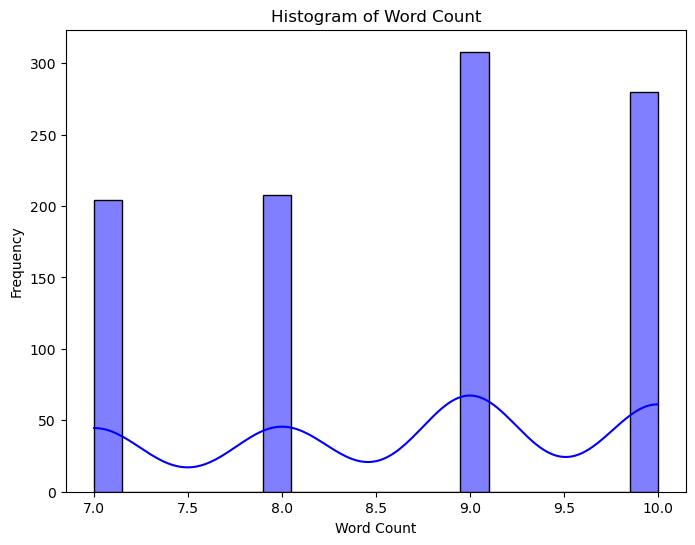

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram for Word_Count
plt.figure(figsize=(8, 6))
sns.histplot(data=release_notes_data, x='Word_Count', bins=20, kde=True, color='blue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')
plt.show()

In [3]:
# Check for and handle missing values
print("Number of missing values in each column:")
print(release_notes_data.isnull().sum())

Number of missing values in each column:
Category               0
Description            0
Word_Count             0
Sentence_Count         0
Technical_Terms        0
Keywords_Present       0
Avg_Sentence_Length    0
dtype: int64


In [4]:
from sklearn import preprocessing
# Preprocessing
preprocessor = preprocessing.LabelEncoder()

# Clean and label the data 
release_notes_data['Category'] = preprocessor.fit_transform(release_notes_data['Category'])
release_notes_data['Description'] = preprocessor.fit_transform(release_notes_data['Description'])

# Feature Extraction
features = ['Category', 'Description', 'Word_Count', 'Sentence_Count',
            'Technical_Terms', 'Keywords_Present', 'Avg_Sentence_Length']

# Assigning complexity scores based on average sentence length
release_notes_data['Complexity_Score'] = release_notes_data['Avg_Sentence_Length'].apply(
    lambda x: 'High' if x > release_notes_data['Avg_Sentence_Length'].mean() else (
        'Low' if x < release_notes_data['Avg_Sentence_Length'].mean() else 'Average'
    ))

# Convert labels to numerical values
label_encoder = preprocessing.LabelEncoder()
release_notes_data['Complexity_Score'] = label_encoder.fit_transform(release_notes_data['Complexity_Score'])

In [5]:
release_notes_data.head(len(release_notes_data))

,Category,Description,Word_Count,Sentence_Count,Technical_Terms,Keywords_Present,Avg_Sentence_Length,Complexity_Score
0,1,6,7,1,0,0,7,1
1,1,3,10,1,0,1,10,0
2,0,8,10,1,0,0,10,0
3,3,6,7,1,0,0,7,1
4,2,3,10,1,0,1,10,0
...,...,...,...,...,...,...,...,...
995,4,2,8,1,0,0,8,1
996,2,9,7,1,0,0,7,1
997,0,1,8,1,0,0,8,1
998,0,9,7,1,0,0,7,1


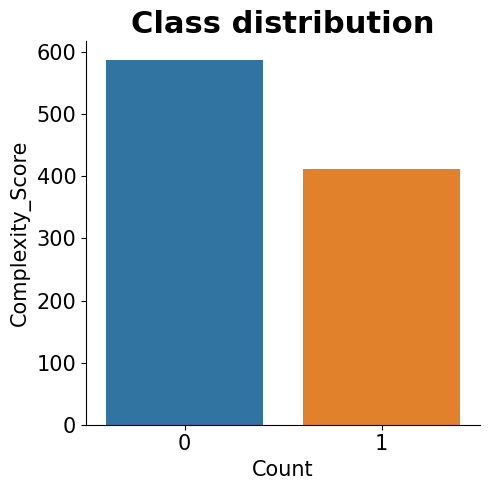

In [6]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Complexity_Score', data=release_notes_data, label='Count')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Complexity_Score', size=15)  
plt.xlabel('Count', size=15)  
sns.despine(top=True)
plt.title('Class distribution', size=22, weight='bold')
plt.tight_layout()
plt.show() 

In [7]:
X=release_notes_data.iloc[:,:28]
y=release_notes_data.iloc[:,-1]
# summarize class distribution
from collections import Counter
counter=Counter(y)
print("Before oversampling",counter)

Before oversampling Counter({0: 588, 1: 412})


In [8]:
from imblearn.over_sampling import SMOTE
# transform the dataset
smote = SMOTE()
X1_resampled, y1_resampled = smote.fit_resample(X, y)

In [9]:
# summarize the new class distribution
counter = Counter(y1_resampled)
print(counter)

Counter({1: 588, 0: 588})


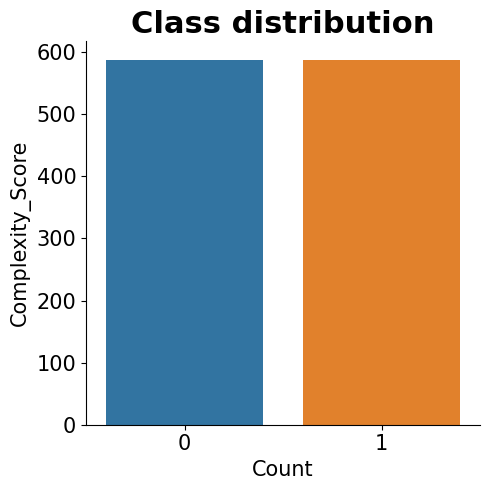

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(x=y1_resampled,data= release_notes_data, label='Count')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Complexity_Score', size=15)
plt.xlabel('Count', size=15)
sns.despine(top=True)
plt.title('Class distribution', size=22, weight='bold')
plt.tight_layout()
plt.show()

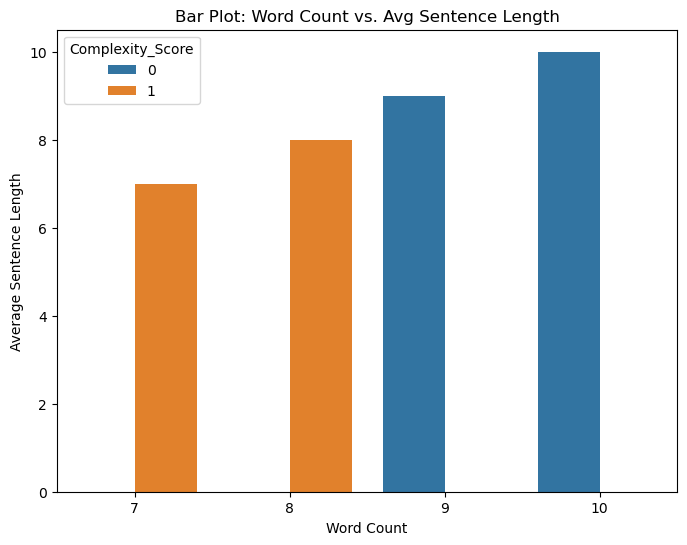

In [11]:
#Analysis
plt.figure(figsize=(8, 6))
sns.barplot(data=release_notes_data, x='Word_Count', y='Avg_Sentence_Length', hue='Complexity_Score')
plt.xlabel('Word Count')
plt.ylabel('Average Sentence Length')
plt.title('Bar Plot: Word Count vs. Avg Sentence Length')
plt.show()

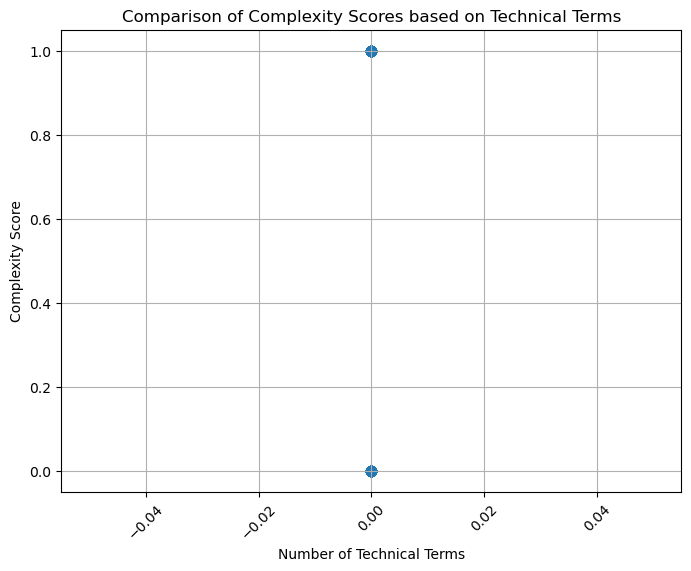

In [12]:
#Analysis

plt.figure(figsize=(8, 6))
plt.scatter(
    release_notes_data['Technical_Terms'],
    release_notes_data['Complexity_Score'],
    alpha=0.7,  # A alpha value to control transparency
    s=50,       # marker size to make points more distinguishable
)
plt.xlabel('Number of Technical Terms')
plt.ylabel('Complexity Score')
plt.title('Comparison of Complexity Scores based on Technical Terms')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [13]:
release_notes_data.to_pickle("df.pkl")

In [14]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Dropout 
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data for training
X = release_notes_data[features]
y = release_notes_data['Complexity_Score']

# Dataset splitting into training and test ratio i.e. 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Build the ANN model
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs = 50 , validation_data = (X_test, y_test) , verbose=1,batch_size=64)
# Print the training and testing accuracies and losses
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)

Epoch 1/50
13/13 [==============================] - 1s 33ms/step - loss: 0.8656 - accuracy: 0.4087 - val_loss: 0.6798 - val_accuracy: 0.6400
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.5987 - val_loss: 0.6755 - val_accuracy: 0.5800
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.5900 - val_loss: 0.6520 - val_accuracy: 0.5800
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.5900 - val_loss: 0.6427 - val_accuracy: 0.6050
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.5938 - val_loss: 0.6347 - val_accuracy: 0.5800
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.5900 - val_loss: 0.6285 - val_accuracy: 0.5800
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.5900 - val_loss: 0.6207 - val_accuracy: 0.5800
Epoch 8/50
13/13 [=

In [17]:
import matplotlib.pyplot as plt

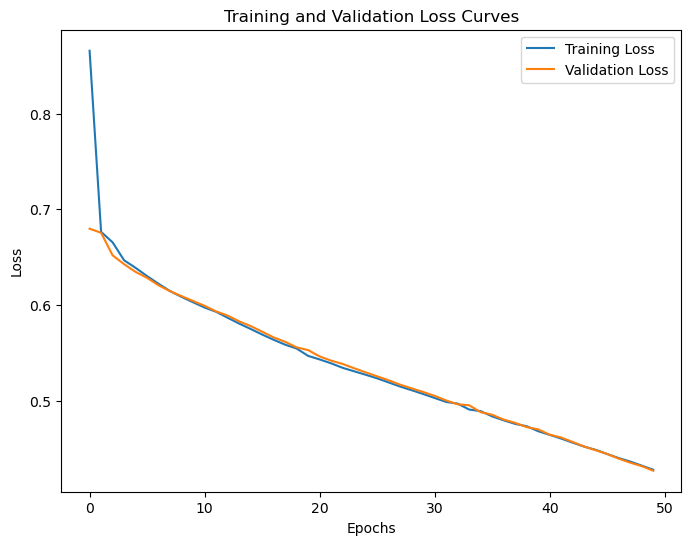

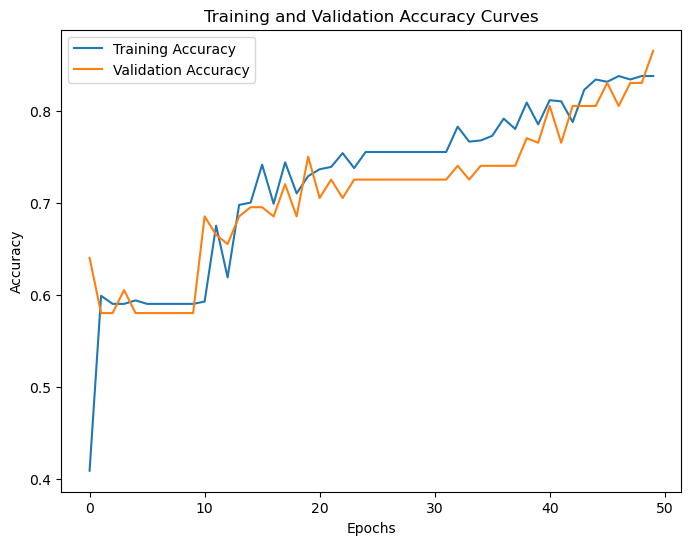

In [18]:
# Plot the training and testing loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# Plot the training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()

In [19]:
# Predict the complexity scores for all release notes
all_predicted_complexity_scores = model.predict(X)

# Define thresholds to classify as high, medium, or low complexity
high_threshold = 0.7
low_threshold = 0.3

# Create a list to store the final complexity scores
final_complexity_scores = []

# Convert the predicted values to complexity labels
for prediction in all_predicted_complexity_scores:
    if prediction > high_threshold:
        final_complexity_scores.append("High")
    elif prediction > low_threshold:
        final_complexity_scores.append("Medium")
    else:
        final_complexity_scores.append("Low")

# Print the predicted complexity score for each release note
for i, complexity_score in enumerate(final_complexity_scores, start=1):
    print(f'Complexity Score for Release Note {i}: {complexity_score}')

32/32 [==============================] - 0s 843us/step
Complexity Score for Release Note 1: Medium
Complexity Score for Release Note 2: Low
Complexity Score for Release Note 3: Low
Complexity Score for Release Note 4: Medium
Complexity Score for Release Note 5: Low
Complexity Score for Release Note 6: Medium
Complexity Score for Release Note 7: Medium
Complexity Score for Release Note 8: Medium
Complexity Score for Release Note 9: Medium
Complexity Score for Release Note 10: Low
Complexity Score for Release Note 11: High
Complexity Score for Release Note 12: Medium
Complexity Score for Release Note 13: Medium
Complexity Score for Release Note 14: Medium
Complexity Score for Release Note 15: Medium
Complexity Score for Release Note 16: Low
Complexity Score for Release Note 17: Medium
Complexity Score for Release Note 18: Medium
Complexity Score for Release Note 19: Medium
Complexity Score for Release Note 20: Medium
Complexity Score for Release Note 21: Low
Complexity Score for Release 

In [20]:
y_test_pred = model.predict(X_test)
threshold = 0.5
y_test_pred_binary = (y_test_pred > threshold).astype(int)
accuracy = model.evaluate(X_test, y_test, verbose=1)
precision = precision_score(y_test, y_test_pred_binary, average='weighted')
recall = recall_score(y_test, y_test_pred_binary, average='weighted')
f1 = f1_score(y_test, y_test_pred_binary, average='weighted')
print('Testing Accuracy:', accuracy)
print('Testing Precision:', precision)
print('Testing Recall:', recall)
print('Testing F1-Score:', f1)

7/7 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8650
Testing Accuracy: [0.4271348714828491, 0.8650000095367432]
Testing Precision: 0.8705011616329239
Testing Recall: 0.865
Testing F1-Score: 0.862481543224577


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import timeit
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
def activation_functions(X_test, y_test):
    X = release_notes_data.iloc[:,:2].values   
    y = release_notes_data.iloc[:,-1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

    layer_sizes = (50,), (50, 50), (50, 50, 50), (100,), (100, 100), (100, 100, 100)
    activation  = "identity", "logistic", "tanh", "relu"

    i = 0
    for layers, function in itertools.product(layer_sizes, activation):
        i += 1
        ANN = MLPClassifier(hidden_layer_sizes = layers, activation = function)
        start_time = timeit.default_timer()
        ANN.fit(X_train, y_train.ravel())

        y_pred = ANN.predict(X_test)
        print("\n  Iteration {}:".format(i))
        print("      Layers Sizes : {}".format(layers))
        print("      Activation   : {}".format(function))
        print("      Accuracy : {}".format(accuracy_score(y_test, y_pred)))
        print("      Precision: {}".format(precision_score(y_test, y_pred,
                                                        average = "weighted")))
        print("      Recall   : {}".format(recall_score(y_test, y_pred,
                                                        average = "weighted")))
        print("      F1       : {}".format(f1_score(y_test, y_pred,
                                                        average = "weighted")))
        print("      Execution time: {:.2f} secs.".format(timeit.default_timer(
                                                            ) - start_time))
    print("")

In [25]:
print("\n* Testing different activation functions with layer size for ANN model.")
input("* Press the ENTER key to get results of iterations ...")
activation_functions(X_test, y_test)


* Testing different activation functions with layer size for ANN model.
* Press the ENTER key to get results of iterations ...

  Iteration 1:
      Layers Sizes : (50,)
      Activation   : identity
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.10 secs.

  Iteration 2:
      Layers Sizes : (50,)
      Activation   : logistic
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.06 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  Iteration 3:
      Layers Sizes : (50,)
      Activation   : tanh
      Accuracy : 0.675
      Precision: 0.7357142857142857
      Recall   : 0.675
      F1       : 0.6359999999999999
      Execution time: 0.24 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Iteration 4:
      Layers Sizes : (50,)
      Activation   : relu
      Accuracy : 0.87
      Precision: 0.877927927927928
      Recall   : 0.87
      F1       : 0.8680653162463828
      Execution time: 0.26 secs.

  Iteration 5:
      Layers Sizes : (50, 50)
      Activation   : identity
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.05 secs.

  Iteration 6:
      Layers Sizes : (50, 50)
      Activation   : logistic
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.15 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  Iteration 7:
      Layers Sizes : (50, 50)
      Activation   : tanh
      Accuracy : 0.875
      Precision: 0.884397583863661
      Recall   : 0.875
      F1       : 0.8729647174548937
      Execution time: 0.43 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Iteration 8:
      Layers Sizes : (50, 50)
      Activation   : relu
      Accuracy : 0.85
      Precision: 0.853404791929382
      Recall   : 0.85
      F1       : 0.8485221674876847
      Execution time: 0.51 secs.

  Iteration 9:
      Layers Sizes : (50, 50, 50)
      Activation   : identity
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.05 secs.

  Iteration 10:
      Layers Sizes : (50, 50, 50)
      Activation   : logistic
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.06 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  Iteration 11:
      Layers Sizes : (50, 50, 50)
      Activation   : tanh
      Accuracy : 0.885
      Precision: 0.894892676086722
      Recall   : 0.885
      F1       : 0.8831275400585022
      Execution time: 0.65 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Iteration 12:
      Layers Sizes : (50, 50, 50)
      Activation   : relu
      Accuracy : 0.865
      Precision: 0.8680667433831991
      Recall   : 0.865
      F1       : 0.8638207945900254
      Execution time: 0.66 secs.

  Iteration 13:
      Layers Sizes : (100,)
      Activation   : identity
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.05 secs.

  Iteration 14:
      Layers Sizes : (100,)
      Activation   : logistic
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.07 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  Iteration 15:
      Layers Sizes : (100,)
      Activation   : tanh
      Accuracy : 0.83
      Precision: 0.8468792401628222
      Recall   : 0.83
      F1       : 0.8252837326607819
      Execution time: 0.33 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Iteration 16:
      Layers Sizes : (100,)
      Activation   : relu
      Accuracy : 0.82
      Precision: 0.8394761029411765
      Recall   : 0.82
      F1       : 0.814317389927146
      Execution time: 0.36 secs.

  Iteration 17:
      Layers Sizes : (100, 100)
      Activation   : identity
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.06 secs.

  Iteration 18:
      Layers Sizes : (100, 100)
      Activation   : logistic
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.06 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  Iteration 19:
      Layers Sizes : (100, 100)
      Activation   : tanh
      Accuracy : 0.88
      Precision: 0.891015625
      Recall   : 0.88
      F1       : 0.8778711484593839
      Execution time: 0.61 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Iteration 20:
      Layers Sizes : (100, 100)
      Activation   : relu
      Accuracy : 0.835
      Precision: 0.8362745098039216
      Recall   : 0.835
      F1       : 0.8339002528154447
      Execution time: 0.71 secs.

  Iteration 21:
      Layers Sizes : (100, 100, 100)
      Activation   : identity
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.10 secs.

  Iteration 22:
      Layers Sizes : (100, 100, 100)
      Activation   : logistic
      Accuracy : 0.55
      Precision: 0.30250000000000005
      Recall   : 0.55
      F1       : 0.3903225806451613
      Execution time: 0.18 secs.


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  Iteration 23:
      Layers Sizes : (100, 100, 100)
      Activation   : tanh
      Accuracy : 1.0
      Precision: 1.0
      Recall   : 1.0
      F1       : 1.0
      Execution time: 0.99 secs.

  Iteration 24:
      Layers Sizes : (100, 100, 100)
      Activation   : relu
      Accuracy : 0.86
      Precision: 0.8759803921568627
      Recall   : 0.86
      F1       : 0.8566168009205984
      Execution time: 0.86 secs.

